# Assignment 1: Understanding Leveraged ETF Behavior - TQQQ vs QQQ Analysis



### Learning Objectives
By completing this assignment, you will:
1. Understand how leveraged ETFs behave under different market conditions
2. Learn about volatility decay and its mathematical foundation
3. Compare theoretical models with real market data
4. Analyze the relationship between volatility and leveraged ETF performance

### Background
TQQQ is a 3x leveraged ETF that seeks to provide 3x the daily return of the QQQ ETF (which tracks the Nasdaq-100). However, due to daily rebalancing, TQQQ experiences **volatility decay** - it tends to underperform the 3x expected return over longer periods, especially in volatile sideways markets.

### Mathematical Foundation
The theoretical relationship for leveraged ETF returns is:

$$E[R_{leveraged}] \approx L \times E[R_{underlying}] - \frac{(L^2-L)}{2} \times Var[R_{underlying}]$$

For TQQQ with L=3:
$$E[R_{TQQQ}] \approx 3 \times E[R_{QQQ}] - 3 \times Var[R_{QQQ}]$$

This shows that higher volatility reduces leveraged ETF performance!

## Setup and Data Preparation

In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Import the data loader module (provided to you)
from data_loader import load_etf_data, get_data_summary, calculate_rolling_metrics

# Set plotting style for professional-looking charts
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print("🎯 Ready to analyze TQQQ vs QQQ relationship!")
print("📊 Data loader module imported - no need to download data manually!")

📚 Libraries imported successfully!
🎯 Ready to analyze TQQQ vs QQQ relationship!
📊 Data loader module imported - no need to download data manually!


---
# Part 1: Simulation Analysis (40 points)

In this section, you'll simulate different market scenarios to understand how TQQQ behaves relative to QQQ under various conditions.

---

## Task 1.1: Set Up Simulation Parameters (5 points)

Define the following parameters for your simulation:
- Trading days: 252 (one year)
- Initial prices: $100 for both QQQ and TQQQ
- Random seed: 42 (for reproducibility)

In [27]:
# CODE HERE: Set up simulation parameters
# Hint: Use np.random.seed() for reproducibility

# Define simulation parameters:
# 1. Set trading_days to 252 (one year of trading days)
trading_days = 252

# 2. Set initial prices to $100 for both ETFs
initial_price_qqq = 100
initial_price_tqqq = 100

# 3. Set random seed to 42 for reproducible results
np.random.seed(42)

print(f"✅ Simulation setup complete!")
print(f"📊 Trading days: {trading_days}")
print(f"💵 Initial prices: QQQ=${initial_price_qqq}, TQQQ=${initial_price_tqqq}")

✅ Simulation setup complete!
📊 Trading days: 252
💵 Initial prices: QQQ=$100, TQQQ=$100


---

## Task 1.2: Generate Market Scenarios (10 points)

Create three different market scenarios using random number generation:

1. **Low Volatility Sideways Market**: Mean return = 0%, Daily volatility = 1%
2. **High Volatility Sideways Market**: Mean return = 0%, Daily volatility = 3%  
3. **Trending Market**: Mean return = 0.08% daily, Daily volatility = 2%

Use `np.random.normal()` to generate daily returns for each scenario.

In [28]:
# CODE HERE: Generate the three market scenarios
# Use np.random.normal(mean, std_dev, number_of_samples) to generate returns

# Scenario 1: Low volatility sideways market
# - Mean return: 0% daily (no trend)
# - Daily volatility: 1% (low volatility)
low_vol_returns = np.random.normal(0, 0.01, trading_days)

# Scenario 2: High volatility sideways market  
# - Mean return: 0% daily (no trend, sideways movement)
# - Daily volatility: 3% (high volatility)
high_vol_returns = np.random.normal(0, 0.03, trading_days)

# Scenario 3: Trending market
# - Mean return: 0.08% daily (0.0008 as decimal, positive trend)
# - Daily volatility: 2% (moderate volatility)
trend_returns = np.random.normal(0.0008, 0.02, trading_days)

print("📈 Market scenarios generated:")
print(f"Low vol mean: {low_vol_returns.mean():.4f}, std: {low_vol_returns.std():.4f}")
print(f"High vol mean: {high_vol_returns.mean():.4f}, std: {high_vol_returns.std():.4f}")
print(f"Trend mean: {trend_returns.mean():.4f}, std: {trend_returns.std():.4f}")

📈 Market scenarios generated:
Low vol mean: -0.0000, std: 0.0097
High vol mean: 0.0008, std: 0.0300
Trend mean: -0.0007, std: 0.0199


---

## Task 1.3: Create TQQQ Simulation Function (10 points)

Write a function that simulates TQQQ performance given QQQ returns. The function should:
- Take underlying returns and leverage factor as inputs
- Calculate leveraged returns (3x for TQQQ)
- Compute cumulative prices for both underlying and leveraged ETF
- Return price series and return series

In [29]:
def simulate_leveraged_etf(underlying_returns, leverage=3):
    """
    Simulate leveraged ETF performance with daily rebalancing
    
    This function models how TQQQ works in practice:
    - Each day, TQQQ rebalances to maintain 3x exposure to QQQ
    - If QQQ goes up 1%, TQQQ should go up ~3%
    - If QQQ goes down 1%, TQQQ should go down ~3%
    
    Parameters:
    underlying_returns: array of daily returns for underlying asset (QQQ)
    leverage: leverage factor (3 for TQQQ)
    
    Returns:
    underlying_prices, leveraged_prices, underlying_returns, leveraged_returns
    """
    # CODE HERE: Implement the simulation function
    
    # Step 1: Calculate leveraged returns
    # TQQQ returns = 3 × QQQ returns (approximately)
    leveraged_returns = underlying_returns * leverage
    
    # Step 2: Calculate cumulative prices using compound growth
    # Start with initial price, then multiply by (1 + return) for each day
    # Use np.cumprod() to calculate cumulative product: (1+r1)×(1+r2)×(1+r3)...
    underlying_prices = initial_price_qqq * np.cumprod(1 + underlying_returns)
    leveraged_prices = initial_price_tqqq * np.cumprod(1 + leveraged_returns)
    
    # Step 3: Return all four arrays for analysis
    return underlying_prices, leveraged_prices, underlying_returns, leveraged_returns

print("🔧 Simulation function created!")
print("💡 This function will help you understand how daily rebalancing affects leveraged ETFs!")

🔧 Simulation function created!
💡 This function will help you understand how daily rebalancing affects leveraged ETFs!


---

## Task 1.4: Run Simulations and Create Visualizations (15 points)

Use your function to simulate all three scenarios and create a 2x2 subplot showing:
1. Low volatility scenario
2. High volatility scenario  
3. Trending market scenario
4. Bar chart comparing actual vs expected returns

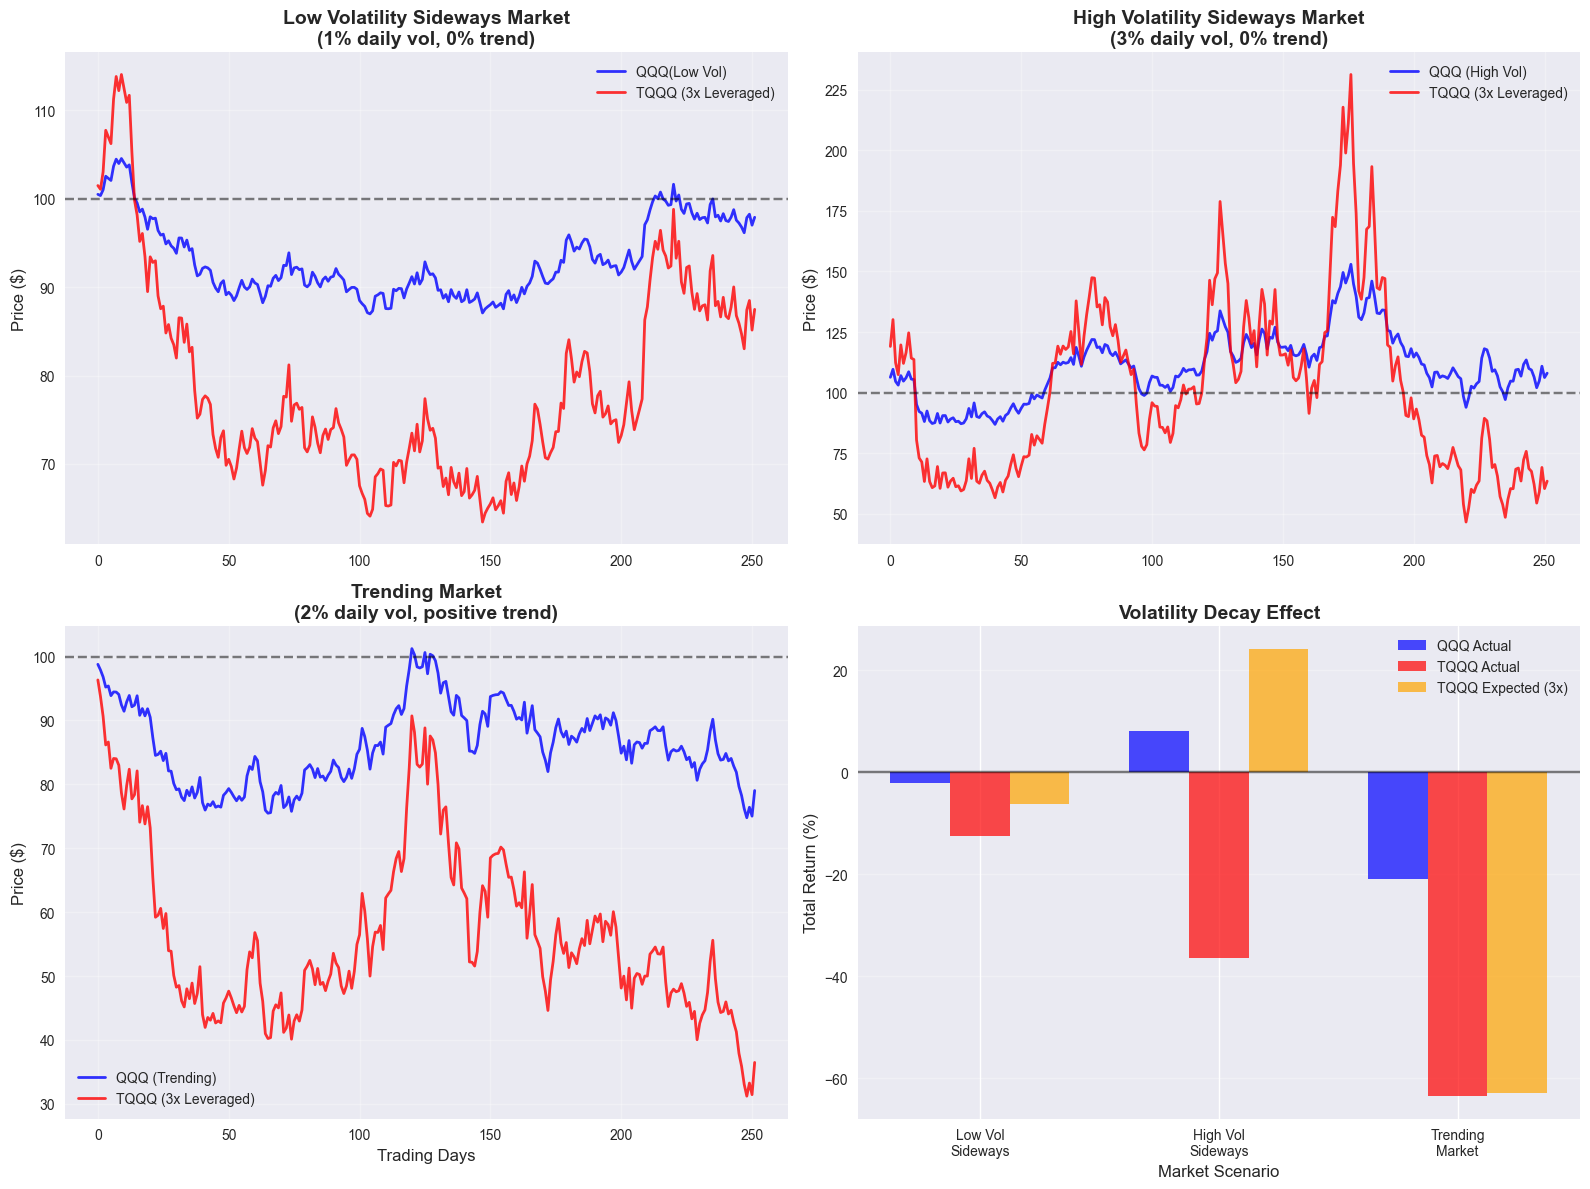

📊 Simulation analysis complete!
🔍 Look at the bar chart - notice how TQQQ actual vs expected differs by scenario!


In [30]:
# CODE HERE: Generate scenarios using your function
# Apply your simulation function to all three market scenarios

# Run simulations for all three scenarios:
# Each function call returns: underlying_prices, leveraged_prices, underlying_returns, leveraged_returns

# Low volatility scenario
low_vol_qqq, low_vol_tqqq, low_vol_rets_qqq, low_vol_rets_tqqq = simulate_leveraged_etf(low_vol_returns)

# High volatility scenario  
high_vol_qqq, high_vol_tqqq, high_vol_rets_qqq, high_vol_rets_tqqq = simulate_leveraged_etf(high_vol_returns)

# Trending market scenario
trend_qqq, trend_tqqq, trend_rets_qqq, trend_rets_tqqq = simulate_leveraged_etf(trend_returns)

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
days = range(trading_days)

# CODE HERE: Create the four plots
# Plot 1: Low volatility scenario (ax1)
# - Plot QQQ and TQQQ price evolution over time
# - Add title: 'Low Volatility Sideways Market\n(1% daily vol, 0% trend)'
# - Add labels and legend
ax1.plot(days, low_vol_qqq, "b-", linewidth = 2, label = "QQQ(Low Vol)", alpha = 0.8)
ax1.plot(days, low_vol_tqqq, "r-", linewidth = 2, label = "TQQQ (3x Leveraged)", alpha = 0.8)
ax1.set_title('Low Volatility Sideways Market\n(1% daily vol, 0% trend)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=100, color='black', linestyle='--', alpha=0.5)  # Starting price line

# Plot 2: High volatility scenario (ax2)
# CODE HERE: Similar to plot 1, but for high volatility scenario
ax2.plot(days, high_vol_qqq, 'b-', linewidth=2, label='QQQ (High Vol)', alpha=0.8)
ax2.plot(days, high_vol_tqqq, 'r-', linewidth=2, label='TQQQ (3x Leveraged)', alpha=0.8)
ax2.set_title('High Volatility Sideways Market\n(3% daily vol, 0% trend)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axhline(y=100, color='black', linestyle='--', alpha=0.5)

# Plot 3: Trending market scenario (ax3)
# CODE HERE: Similar to plots 1 & 2, but for trending market
ax3.plot(days, trend_qqq, 'b-', linewidth=2, label='QQQ (Trending)', alpha=0.8)
ax3.plot(days, trend_tqqq, 'r-', linewidth=2, label='TQQQ (3x Leveraged)', alpha=0.8)
ax3.set_title('Trending Market\n(2% daily vol, positive trend)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Trading Days', fontsize=12)
ax3.set_ylabel('Price ($)', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.axhline(y=100, color='black', linestyle='--', alpha=0.5)

# Plot 4: Return comparison bar chart (ax4)
scenarios = ['Low Vol\nSideways', 'High Vol\nSideways', 'Trending\nMarket']

# Calculate total returns for each scenario
# Total return = (final_price / initial_price - 1) * 100
qqq_returns = [
    (low_vol_qqq[-1] / initial_price_qqq - 1) * 100,
    (high_vol_qqq[-1] / initial_price_qqq - 1) * 100,
    (trend_qqq[-1] / initial_price_qqq - 1) * 100
]
tqqq_returns = [
    (low_vol_tqqq[-1] / initial_price_tqqq - 1) * 100,
    (high_vol_tqqq[-1] / initial_price_tqqq - 1) * 100,
    (trend_tqqq[-1] / initial_price_tqqq - 1) * 100
]

# Expected 3x returns (for comparison)
expected_tqqq = [r * 3 for r in qqq_returns]

# Create bar chart
x = np.arange(len(scenarios))
width = 0.25

bars1 = ax4.bar(x - width, qqq_returns, width, label='QQQ Actual', color='blue', alpha=0.7)
bars2 = ax4.bar(x, tqqq_returns, width, label='TQQQ Actual', color='red', alpha=0.7)
bars3 = ax4.bar(x + width, expected_tqqq, width, label='TQQQ Expected (3x)', color='orange', alpha=0.7)

ax4.set_title('Volatility Decay Effect', fontsize=14, fontweight='bold')
ax4.set_xlabel('Market Scenario', fontsize=12)
ax4.set_ylabel('Total Return (%)', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(scenarios)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

print("📊 Simulation analysis complete!")
print("🔍 Look at the bar chart - notice how TQQQ actual vs expected differs by scenario!")

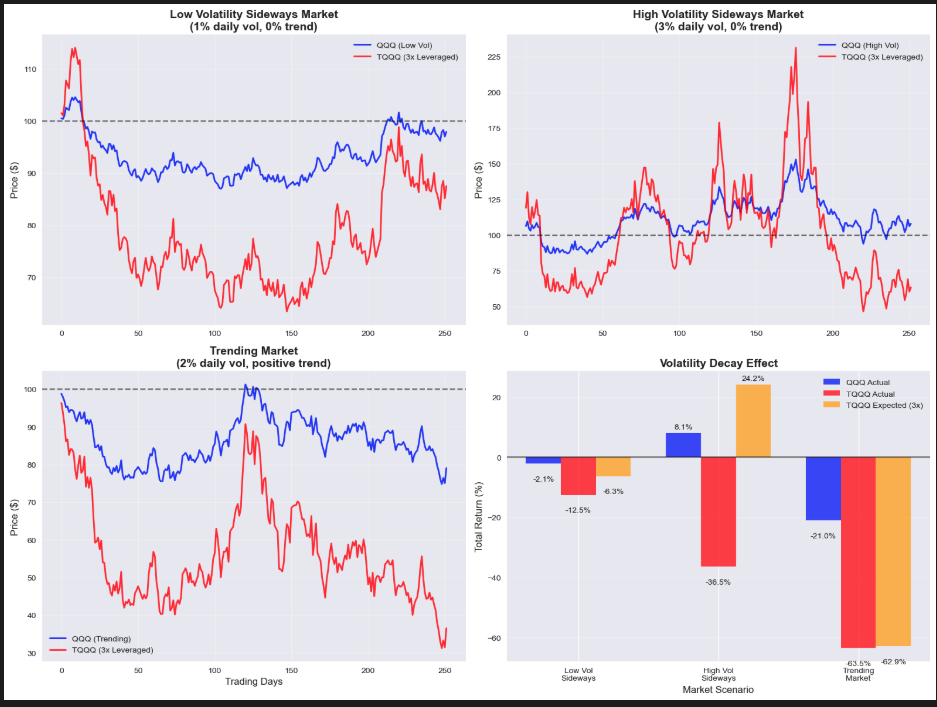

---
# Part 2: Real Data Analysis (40 points)

Now you'll analyze real QQQ and TQQQ data to see how the theoretical model compares to reality.

---

## Task 2.1: Load Pre-Downloaded Real Data (5 points)

Load the pre-downloaded QQQ and TQQQ data using the provided data loader. Examine the data structure and summary statistics.

In [31]:
# CODE HERE: Load the pre-downloaded data
# Use the data loader functions provided in data_loader.py

# Step 1: Load price and return data using the data loader
# The load_etf_data() function returns two DataFrames: prices and returns
data, returns = load_etf_data()  # CODE HERE: call the function

# Step 2: Check if data loaded successfully
if data is not None and returns is not None:
    # Step 3: Display data summary using the provided function
    get_data_summary(data, returns)
    
    # Step 4: Calculate cumulative returns for plotting later
    # This transforms daily returns into cumulative performance
    cumulative_returns = (1 + returns).cumprod()
    
    print(f"✅ Data loaded successfully")
    print(f"📊 Ready for analysis")
    print(f"📈 Data contains {len(data)} trading days")
else:
    print("❌ Failed to load data")
    print("🔍 Make sure qqq_tqqq_prices.csv and qqq_tqqq_returns.csv are in your directory")

📊 ETF DATA SUMMARY
📅 Date range: 2023-09-26 to 2025-09-24
📈 Number of observations: 501
🗓️  Trading days covered: 501 days

💰 PRICE STATISTICS:
   QQQ price range: $339.49 - $602.20
   TQQQ price range: $30.10 - $104.62

📊 RETURN STATISTICS:
   QQQ:
     Average daily return: 0.0012 (29.00% annualized)
     Daily volatility: 0.0131 (20.76% annualized)

   TQQQ:
     Average daily return: 0.0030 (74.43% annualized)
     Daily volatility: 0.0389 (61.69% annualized)

🔢 Actual leverage ratio: 2.57x (vs 3x target)
🔗 QQQ-TQQQ correlation: 1.000
✅ Data loaded successfully
📊 Ready for analysis
📈 Data contains 501 trading days


---

## Task 2.2: Calculate Rolling Volatility (5 points)

Calculate 30-day rolling volatility for QQQ returns using the data loader's rolling metrics function.

In [33]:
# CODE HERE: Calculate rolling metrics
# Use the calculate_rolling_metrics function from data_loader

# Step 1: Calculate 30-day rolling metrics using the data loader function
# This function calculates rolling volatility, correlation, and other metrics
rolling_metrics = calculate_rolling_metrics(returns, window = 30)

# Step 2: Extract specific metrics we need for analysis
# Extract pre-calculated rolling volatility for QQQ
rolling_vol = rolling_metrics['QQQ_volatility']  # CODE HERE: get QQQ volatility column

# Extract rolling correlation between QQQ and TQQQ
rolling_corr = rolling_metrics['correlation']   # CODE HERE: get correlation column

print(f"📊 30-day rolling metrics calculated using data_loader")
print(f"📈 Average volatility: {rolling_vol.mean():.2%}")
print(f"📉 Volatility range: {rolling_vol.min():.2%} - {rolling_vol.max():.2%}")
print(f"🔗 Average QQQ-TQQQ correlation: {rolling_corr.mean():.3f}")
print(f"🔢 Available metrics: {', '.join(rolling_metrics.columns)}")

# Step 3: Display a sample of the rolling metrics data
print(f"\n📋 Sample of rolling metrics data:")
print(rolling_metrics.head().to_string())  # Show first 5 rows

📊 30-day rolling metrics calculated using data_loader
📈 Average volatility: 19.16%
📉 Volatility range: 8.80% - 51.32%
🔗 Average QQQ-TQQQ correlation: 1.000
🔢 Available metrics: QQQ_volatility, TQQQ_volatility, correlation, QQQ_mean, TQQQ_mean, QQQ_variance, TQQQ_variance, leverage_ratio

📋 Sample of rolling metrics data:
            QQQ_volatility  TQQQ_volatility  correlation  QQQ_mean  TQQQ_mean  QQQ_variance  TQQQ_variance  leverage_ratio
Date                                                                                                                      
2023-11-07        0.182849         0.548398     0.999739  0.001762   0.004757      0.000133       0.001193        2.699803
2023-11-08        0.182869         0.548448     0.999740  0.001705   0.004614      0.000133       0.001194        2.705463
2023-11-09        0.183708         0.551168     0.999744  0.001170   0.003015      0.000134       0.001206        2.576958
2023-11-10        0.193796         0.581242     0.999774  0.00

---

## Task 2.3: Apply Theoretical Model (5 points)

Use the theoretical formula to calculate what TQQQ returns should be based on QQQ returns and volatility:

$$E[R_{TQQQ}] \approx 3 \times E[R_{QQQ}] - 3 \times Var[R_{QQQ}]$$

Calculate this on a rolling 30-day basis.

In [34]:
# CODE HERE: Apply theoretical model

# Step 1: Extract rolling variance from the pre-calculated metrics
# Variance is needed for the theoretical formula
rolling_var_qqq = rolling_metrics['QQQ_variance']  # CODE HERE: get QQQ variance column

# Step 2: Apply the theoretical formula for leveraged ETF returns
# Formula: E[TQQQ] = 3 × E[QQQ] - 3 × Var[QQQ]
# We use actual daily QQQ returns (not rolling mean) + volatility decay adjustment
theoretical_tqqq_return = 3 * returns['QQQ'] - 3 * rolling_var_qqq # CODE HERE: rolling variance

# Step 3: Calculate simple 3x leverage for comparison (no volatility adjustment)
# This shows what TQQQ would return if there was no volatility decay
simple_3x_return = 3 * returns['QQQ'] # CODE HERE: QQQ returns

# Step 4: Calculate cumulative performance for comparison
# Transform daily returns into cumulative performance over time
actual_tqqq_cumret = cumulative_returns['TQQQ']                    # CODE HERE: get TQQQ cumulative returns
theoretical_tqqq_cumret = (1 + theoretical_tqqq_return).cumprod()  # Calculate theoretical cumulative
simple_3x_cumret = (1 + simple_3x_return).cumprod()          # Calculate simple 3x cumulative

print("🧮 Theoretical model applied")
print(f"📊 Theoretical vs Actual TQQQ comparison ready")
print(f"📈 Theoretical TQQQ annual return: {theoretical_tqqq_return.mean()*252:.2%}")
print(f"📈 Actual TQQQ annual return: {returns['TQQQ'].mean()*252:.2%}")
print(f"📈 Simple 3x annual return: {simple_3x_return.mean()*252:.2%}")
print(f"\n💡 Notice the difference between theoretical, actual, and simple 3x returns!")

🧮 Theoretical model applied
📊 Theoretical vs Actual TQQQ comparison ready
📈 Theoretical TQQQ annual return: 71.88%
📈 Actual TQQQ annual return: 74.43%
📈 Simple 3x annual return: 87.00%

💡 Notice the difference between theoretical, actual, and simple 3x returns!


---

## Task 2.4: Create Comparison Analysis (25 points)

Create visualizations comparing:
1. Actual TQQQ vs Theoretical TQQQ performance
2. Rolling volatility over time
3. Performance during different volatility periods

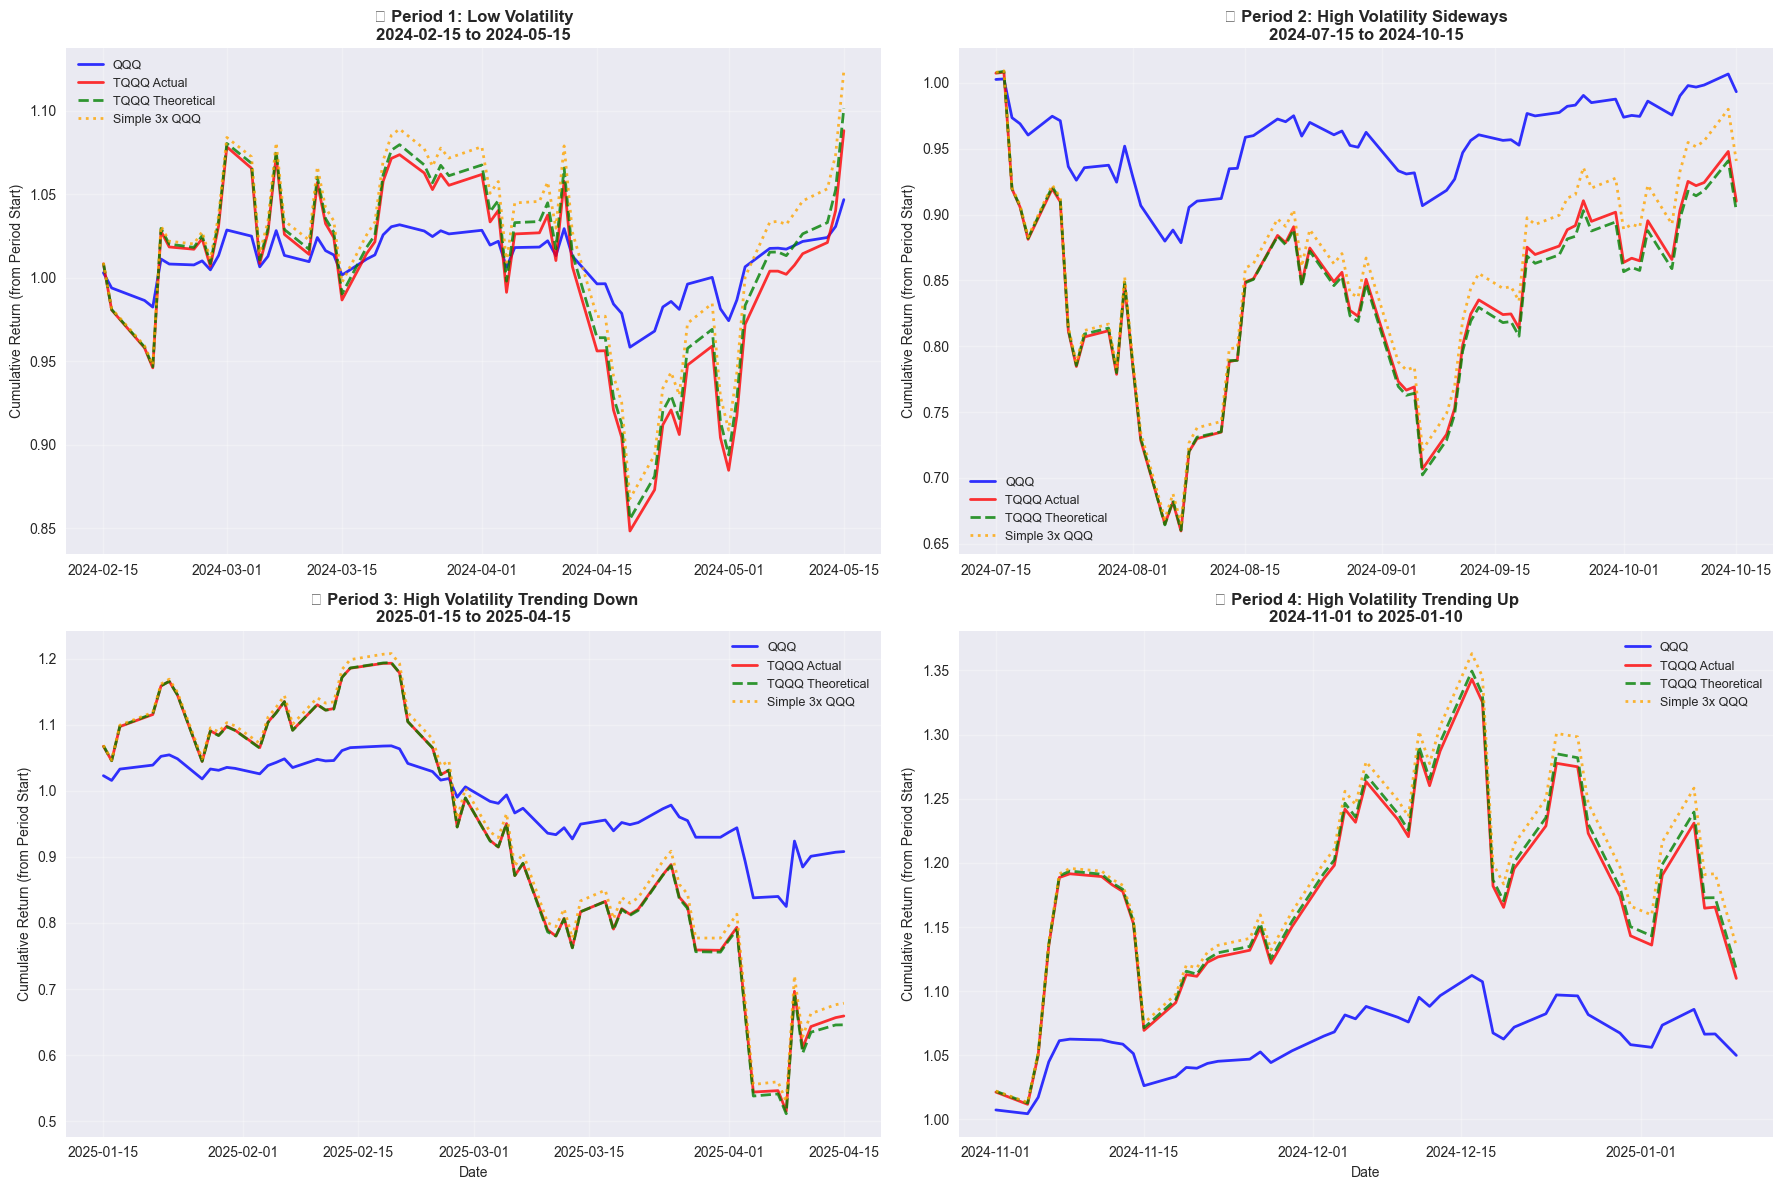


📊 DEFINED MARKET PERIODS FOR PART 3 ANALYSIS:
📋 THE FOUR ANALYSIS PERIODS:

🟢 PERIOD 1 - LOW VOLATILITY PERIOD:
   📅 Dates: 2024-02-15 to 2024-05-15

🟡 PERIOD 2 - HIGH VOLATILITY SIDEWAYS PERIOD:
   📅 Dates: 2024-07-15 to 2024-10-15

🔴 PERIOD 3 - HIGH VOLATILITY TRENDING DOWN PERIOD:
   📅 Dates: 2025-01-15 to 2025-04-15

🟣 PERIOD 4 - HIGH VOLATILITY TRENDING UP PERIOD:
   📅 Dates: 2024-11-01 to 2025-01-10

📊 These FOUR PERIODS will be the basis for your Part 3 analysis!
🎯 Key Insight: Notice how volatility decay affects TQQQ differently in each scenario!


In [35]:
# CODE HERE: Create comparison visualizations
# We'll analyze 4 different market periods to understand TQQQ behavior

# Step 1: Define the four periods explicitly with specific dates
# These periods are chosen to show different market conditions:
period1_start = pd.to_datetime('2024-02-15')  # Low volatility period
period1_end = pd.to_datetime('2024-05-15')

period2_start = pd.to_datetime('2024-07-15')  # High volatility sideways period  
period2_end = pd.to_datetime('2024-10-15')

period3_start = pd.to_datetime('2025-01-15')  # High volatility trending down period
period3_end = pd.to_datetime('2025-04-15')

period4_start = pd.to_datetime('2024-11-01')  # High volatility trending up period
period4_end = pd.to_datetime('2025-01-10')

# Step 2: Create 2x2 subplot for all 4 market scenarios
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Step 3: Function to calculate period-specific cumulative returns
def get_period_cumulative_returns(start_date, end_date):
    """Calculate cumulative returns starting from the period's start date"""
    # CODE HERE: Extract period-specific data
    period_returns = returns.loc[start_date:end_date]
    period_theoretical = theoretical_tqqq_return.loc[start_date:end_date]
    period_simple3x = (3 * returns['QQQ']).loc[start_date:end_date]
    
    # Calculate cumulative returns starting from 1.0 for this specific period
    period_qqq_cumret = (1 + period_returns['QQQ']).cumprod()    # CODE HERE
    period_tqqq_cumret = (1 + period_returns['TQQQ']).cumprod()  # CODE HERE
    period_theo_cumret = (1 + period_theoretical).cumprod()
    period_3x_cumret = (1 + period_simple3x).cumprod()
    
    return period_qqq_cumret, period_tqqq_cumret, period_theo_cumret, period_3x_cumret

# Step 4: Plot all four periods

# Plot 1: Period 1 - Low Volatility
p1_qqq, p1_tqqq, p1_theo, p1_3x = get_period_cumulative_returns(period1_start, period1_end)

ax1.plot(p1_qqq.index, p1_qqq, 'b-', linewidth=2, label='QQQ', alpha=0.8)
ax1.plot(p1_tqqq.index, p1_tqqq, 'r-', linewidth=2, label='TQQQ Actual', alpha=0.8)
ax1.plot(p1_theo.index, p1_theo, 'g--', linewidth=2, label='TQQQ Theoretical', alpha=0.8)
ax1.plot(p1_3x.index, p1_3x, 'orange', linestyle=':', linewidth=2, label='Simple 3x QQQ', alpha=0.8)
ax1.set_title('🟢 Period 1: Low Volatility\n2024-02-15 to 2024-05-15', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cumulative Return (from Period Start)', fontsize=10)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: Period 2 - High Volatility Sideways
# CODE HERE: Similar to plot 1, but for period 2
p2_qqq, p2_tqqq, p2_theo, p2_3x = get_period_cumulative_returns(period2_start, period2_end)

ax2.plot(p2_qqq.index, p2_qqq, 'b-', linewidth=2, label='QQQ', alpha=0.8)
ax2.plot(p2_tqqq.index, p2_tqqq, 'r-', linewidth=2, label='TQQQ Actual', alpha=0.8)
ax2.plot(p2_theo.index, p2_theo, 'g--', linewidth=2, label='TQQQ Theoretical', alpha=0.8)
ax2.plot(p2_3x.index, p2_3x, 'orange', linestyle=':', linewidth=2, label='Simple 3x QQQ', alpha=0.8)
ax2.set_title('🟡 Period 2: High Volatility Sideways\n2024-07-15 to 2024-10-15', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Return (from Period Start)', fontsize=10)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Period 3 - High Volatility Trending Down
# CODE HERE: Similar to plots 1 & 2, but for period 3
p3_qqq, p3_tqqq, p3_theo, p3_3x = get_period_cumulative_returns(period3_start, period3_end)

ax3.plot(p3_qqq.index, p3_qqq, 'b-', linewidth=2, label='QQQ', alpha=0.8)
ax3.plot(p3_tqqq.index, p3_tqqq, 'r-', linewidth=2, label='TQQQ Actual', alpha=0.8)
ax3.plot(p3_theo.index, p3_theo, 'g--', linewidth=2, label='TQQQ Theoretical', alpha=0.8)
ax3.plot(p3_3x.index, p3_3x, 'orange', linestyle=':', linewidth=2, label='Simple 3x QQQ', alpha=0.8)
ax3.set_title('🔴 Period 3: High Volatility Trending Down\n2025-01-15 to 2025-04-15', fontsize=12, fontweight='bold')
ax3.set_ylabel('Cumulative Return (from Period Start)', fontsize=10)
ax3.set_xlabel('Date', fontsize=10)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Period 4 - High Volatility Trending Up
# CODE HERE: Similar to plots 1, 2 & 3, but for period 4
p4_qqq, p4_tqqq, p4_theo, p4_3x = get_period_cumulative_returns(period4_start, period4_end)

ax4.plot(p4_qqq.index, p4_qqq, 'b-', linewidth=2, label='QQQ', alpha=0.8)
ax4.plot(p4_tqqq.index, p4_tqqq, 'r-', linewidth=2, label='TQQQ Actual', alpha=0.8)
ax4.plot(p4_theo.index, p4_theo, 'g--', linewidth=2, label='TQQQ Theoretical', alpha=0.8)
ax4.plot(p4_3x.index, p4_3x, 'orange', linestyle=':', linewidth=2, label='Simple 3x QQQ', alpha=0.8)
ax4.set_title('🟣 Period 4: High Volatility Trending Up\n2024-11-01 to 2025-01-10', fontsize=12, fontweight='bold')
ax4.set_ylabel('Cumulative Return (from Period Start)', fontsize=10)
ax4.set_xlabel('Date', fontsize=10)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 5: EXPLICITLY DEFINED MARKET PERIODS FOR PART 3 ANALYSIS
print("\n📊 DEFINED MARKET PERIODS FOR PART 3 ANALYSIS:")
print("=" * 70)

print(f"📋 THE FOUR ANALYSIS PERIODS:")

print(f"\n🟢 PERIOD 1 - LOW VOLATILITY PERIOD:")
print(f"   📅 Dates: {period1_start.strftime('%Y-%m-%d')} to {period1_end.strftime('%Y-%m-%d')}")
# CODE HERE: Calculate and display metrics for Period 1
# Calculate volatility, QQQ return, TQQQ return, expected 3x return, volatility decay

print(f"\n🟡 PERIOD 2 - HIGH VOLATILITY SIDEWAYS PERIOD:")
print(f"   📅 Dates: {period2_start.strftime('%Y-%m-%d')} to {period2_end.strftime('%Y-%m-%d')}")
# CODE HERE: Calculate and display metrics for Period 2

print(f"\n🔴 PERIOD 3 - HIGH VOLATILITY TRENDING DOWN PERIOD:")
print(f"   📅 Dates: {period3_start.strftime('%Y-%m-%d')} to {period3_end.strftime('%Y-%m-%d')}")
# CODE HERE: Calculate and display metrics for Period 3

print(f"\n🟣 PERIOD 4 - HIGH VOLATILITY TRENDING UP PERIOD:")
print(f"   📅 Dates: {period4_start.strftime('%Y-%m-%d')} to {period4_end.strftime('%Y-%m-%d')}")
# CODE HERE: Calculate and display metrics for Period 4

print("\n📊 These FOUR PERIODS will be the basis for your Part 3 analysis!")
print("🎯 Key Insight: Notice how volatility decay affects TQQQ differently in each scenario!")

---
# Part 3: Analysis and Questions (20 points)

Use your simulation results and real data analysis to answer the following questions. Be specific and reference actual numbers from your analysis.

## Question 1 (10 points)
**Based on your simulation results, explain why TQQQ underperforms in high volatility sideways markets. Use specific numbers from your analysis.**


**Your Answer:**
```
CODE HERE: Write your analysis. You can use calculated numbers to support your explanation.

```


## Question 2 (10 points)
**Based on your findings, what trading strategies would you recommend for TQQQ? When should investors use it and when should they avoid it?**

**Instructions for your answer:**
- Provide specific, actionable recommendations
- Reference your analysis to support your recommendations
- Consider different types of investors (day traders vs long-term investors)
- Include specific market conditions and volatility thresholds

**Your Answer:**
```
CODE HERE: Write your analysis


```

---


**Total for Part 3: 20 points**

In [ ]:
# Optional: Explore additional patterns in the data
# Examples:
# - Seasonal patterns in volatility decay
# - Impact of large daily moves on subsequent performance
# - Analysis of maximum drawdowns

print("💡 Bonus analysis - explore patterns in the real data!")

---
# Submission Instructions

1. Complete all code cells with working solutions
2. Answer all analysis questions with specific examples from your data
3. Ensure all plots are properly labeled and professional
4. Save your notebook and submit via the course platform

**Files Needed:**
- This notebook (.ipynb file)
- `data_loader.py` (provided)
- `qqq_tqqq_prices.csv` (provided)
- `qqq_tqqq_returns.csv` (provided)

**Grading Rubric:**
- Part 1 Simulation: 40 points
- Part 2 Real Data Analysis: 40 points  
- Part 3 Analysis Questions: 20 points
- **Total: 100 points**

